# Мария Студеникина СТФИ-122
## Вариант 2
## Творческое задание

In [1]:
# Импорт библиотек для проведения расчетов
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.neural_network import MLPRegressor

In [2]:
# Импорт библиотек для визуализации
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

## Загрузка данных

In [3]:
# Загружаем данные из CSV файла
df = pd.read_csv("/Users/manya/Desktop/data/dz_2/mnist_small.csv")
# Пример данных
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
all_images = np.loadtxt('/Users/manya/Desktop/data/dz_2/mnist_small.csv',\
delimiter=',', skiprows=1)[:,1:]
# Пример данных
print(all_images.shape)

(5999, 784)


Массив первого изображения выглядит так: 
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57

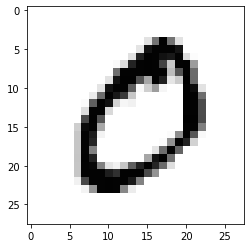

In [5]:
# Вывести массивное представление первого изображения
print("Массив первого изображения выглядит так:", '\n', all_images[0])
plt.imshow(all_images[0].reshape(28,28),  cmap='Greys')
plt.show()

## Формирование признакового пространства

Данный набор данных содержит подмножество эталонного набора данных рукописных цифр MNIST. 5923 картинок 28x28 пикселей с изображением нуля и 76 картинок с изображением шестерки. 

Задача состоит в том, чтобы с использованием методов обучения без учителя для своего варианта (AE) построить одноклассовую модель на основе поиска аномалий, которая максимально хорошо отфильтрует шестерки (как аномалии) от нулей (как основной выборки). Признаки картинок описываются их координатами (в названии переменных, например «10x12») и значением яркости точки по этим координатам.

In [6]:
def plot_roc(df):
    fpr, tpr, threshold = metrics.roc_curve(df["label"], df["pred"])
    
    fnr = 1 - tpr
    EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    plt.plot(fpr, tpr)
    plt.plot([0,1], [1,0])
    plt.plot([EER, EER], [1-EER, 0],linestyle='dotted', color="grey") 
    plt.plot([0,EER], [1-EER, 1-EER], linestyle= 'dotted', color="grey")
    plt.show()
    return EER

In [7]:
df['label'] = df['label'].replace(6,1)
X = df.copy()
X = X.set_index("label")

model = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, alpha=0.01, activation='tanh')
model.fit(X, X)

E = abs(X - model.predict(X))
ET = np.apply_along_axis(np.linalg.norm, 1, E)

df["pred"] = ET


/Users/manya/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


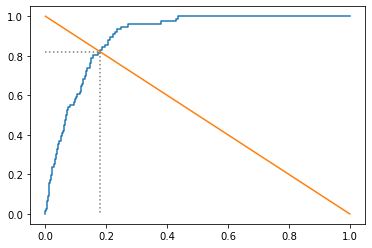

ERR = 0.1794698632449772


In [8]:
EER = plot_roc(df)
print(f'ERR = {EER}')

Постройте ROC кривую с ERR. Выведите 4 картинки с числами (28 на 28 пикселей):
-  самый типичный “0” – true negative с минимальной аномальностью
-  самая аномальная “6” – true positive с максимальной аномальностью
-  самый нетипичный “0” – false positive с максимальной аномальностью
-  самая неаномальная “6” – false negative с минимальной аномальностью

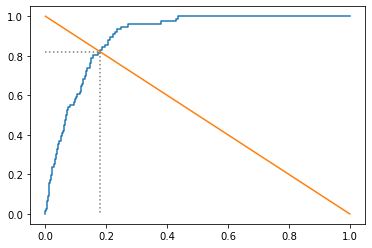

Text(0.5, 1.0, 'True Positive')

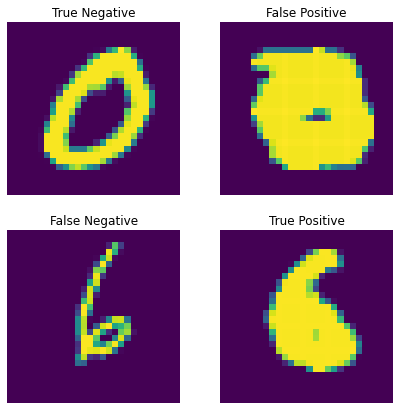

In [18]:
plot_roc(df)

zeros = df[df["label"] == 0]
sixes = df[df["label"] == 1]


fig = plt.figure(figsize=(7, 7))

rows = 2
columns = 2

Image1 = zeros[zeros["pred"] == zeros["pred"].min()].values[0][1:-1].reshape(28, 28)

Image2 = zeros[zeros["pred"] == zeros["pred"].max()].values[0][1:-1].reshape(28, 28)

Image3 = sixes[sixes["pred"] == sixes["pred"].min()].values[0][1:-1].reshape(28, 28)

Image4 = sixes[sixes["pred"] == sixes["pred"].max()].values[0][1:-1].reshape(28, 28)

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("True Negative")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("False Positive")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("False Negative")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title("True Positive")